In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
# get adjusted closing prices for Goldman Sachs and S&P 500 from yahoo finance over a 10 year period
GS = web.get_data_yahoo('GS',start='01/01/2010',end='31/12/2019',interval='d')['Adj Close']
SP500 = web.get_data_yahoo('^GSPC',start='01/01/2010',end='31/12/2019',interval='d')['Adj Close']

<AxesSubplot:xlabel='Period', ylabel='Returns'>

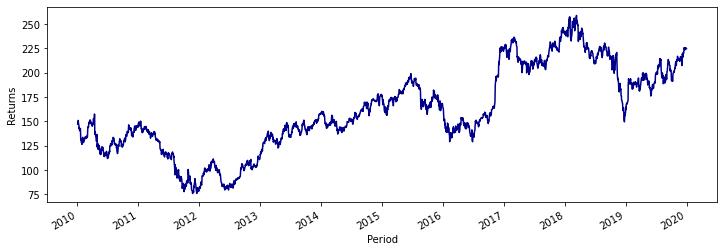

In [3]:
# plotting GS and S&P 500 price data
GS.plot(x='Date',y='Price',color = 'darkblue',xlabel = 'Period',ylabel = 'Returns',figsize = (12,4))

<AxesSubplot:xlabel='Period', ylabel='Returns'>

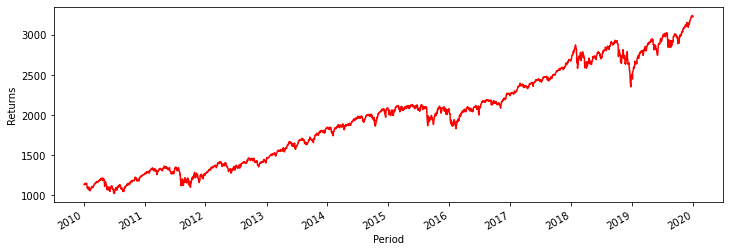

In [4]:
SP500.plot(x='Date',y='Price',color = 'red',xlabel = 'Period',ylabel = 'Returns',figsize = (12,4))

In [5]:
# alternative method to use yfinance library to download stock prices
alt_GS = yf.Ticker("GS")
alt_SP500 = yf.Ticker("^GSPC")
alt_GS_data = alt_GS.history(start='2015-01-01',end='2019-12-31')
alt_SP500_data = alt_SP500.history(start='2015-01-01',end='2019-12-31')

In [6]:
alt_GS_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,176.902796,177.292283,174.547709,176.096634,1877700,0.0,0
2015-01-05,174.873798,175.761478,169.819430,170.598419,3413200,0.0,0
2015-01-06,170.562179,170.888268,166.603823,167.147308,3429200,0.0,0
2015-01-07,169.248742,170.281353,168.270476,169.638229,1896800,0.0,0
2015-01-08,171.513284,172.844812,171.422699,172.346619,1962500,0.0,0


In [7]:
alt_SP500_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,0,0
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,0,0
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,0,0
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,0,0
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,0,0


In [8]:
# calculate monthly returns from adjusted closing prices
GS_returns = GS.pct_change()
GS_returns.head()

Date
2010-01-04         NaN
2010-01-05    0.017679
2010-01-06   -0.010674
2010-01-07    0.019569
2010-01-08   -0.018912
Name: Adj Close, dtype: float64

In [9]:
SP500_returns = SP500.pct_change()
SP500_returns.head()

Date
2010-01-04         NaN
2010-01-05    0.003116
2010-01-06    0.000546
2010-01-07    0.004001
2010-01-08    0.002882
Name: Adj Close, dtype: float64

In [10]:
# remove NaN in the beginning for both GS and S&P 500
GS_data = GS_returns.dropna()
GS_data.index = pd.DatetimeIndex(GS_data.index).to_period('D')
GS_data.head()

Date
2010-01-05    0.017679
2010-01-06   -0.010674
2010-01-07    0.019569
2010-01-08   -0.018912
2010-01-11   -0.015776
Freq: D, Name: Adj Close, dtype: float64

In [11]:
SP500_data = SP500_returns.dropna()
SP500_data.index = pd.DatetimeIndex(SP500_data.index).to_period('D')
SP500_data.head()

Date
2010-01-05    0.003116
2010-01-06    0.000546
2010-01-07    0.004001
2010-01-08    0.002882
2010-01-11    0.001747
Freq: D, Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Period', ylabel='Returns'>

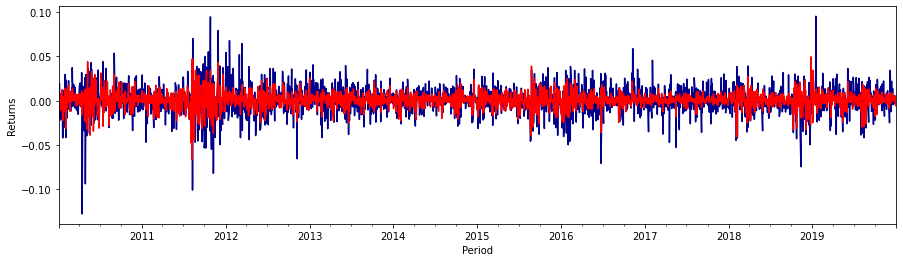

In [12]:
# plotting GS and S&P 500 returns data
GS_data.plot(x='Date',y='Returns',color = 'darkblue',xlabel = 'Period',ylabel = 'Returns',figsize = (15,4))
SP500_data.plot(x='Date',y='Returns',color = 'red',xlabel = 'Period',ylabel = 'Returns',figsize = (15,4))

In [13]:
# creating autoregression model for GS and S&P 500
model_GS = AutoReg(GS_data,lags = 5,old_names = True).fit()
print(model_GS.summary())

                            AutoReg Model Results                             
Dep. Variable:              Adj Close   No. Observations:                 2515
Model:                     AutoReg(5)   Log Likelihood                6758.576
Method:               Conditional MLE   S.D. of innovations              0.016
Date:                Thu, 31 Dec 2020   AIC                             -8.218
Time:                        17:02:37   BIC                             -8.201
Sample:                    01-12-2010   HQIC                            -8.212
                         - 12-31-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0003      0.000      0.992      0.321      -0.000       0.001
Adj Close.L1    -0.0411      0.020     -2.063      0.039      -0.080      -0.002
Adj Close.L2     0.0299      0.020      1.50

In [14]:
model_SP500 = AutoReg(SP500_data,lags = 5,old_names = True).fit()
print(model_SP500.summary())

                            AutoReg Model Results                             
Dep. Variable:              Adj Close   No. Observations:                 2515
Model:                     AutoReg(5)   Log Likelihood                8190.206
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Thu, 31 Dec 2020   AIC                             -9.358
Time:                        17:02:37   BIC                             -9.342
Sample:                    01-12-2010   HQIC                            -9.352
                         - 12-31-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0005      0.000      2.902      0.004       0.000       0.001
Adj Close.L1    -0.0486      0.020     -2.444      0.015      -0.088      -0.010
Adj Close.L2  2.062e-05      0.020      0.00

In [15]:
# OLS regression for market model
# S&P 500 returns as independent variable and GS returns as dependent variable
X = sm.add_constant(SP500_data)
market_model = sm.OLS(GS_data,X).fit()
print(market_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     2613.
Date:                Thu, 31 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:02:37   Log-Likelihood:                 7662.8
No. Observations:                2515   AIC:                        -1.532e+04
Df Residuals:                    2513   BIC:                        -1.531e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -1.204      0.2

<AxesSubplot:xlabel='Period', ylabel='Returns'>

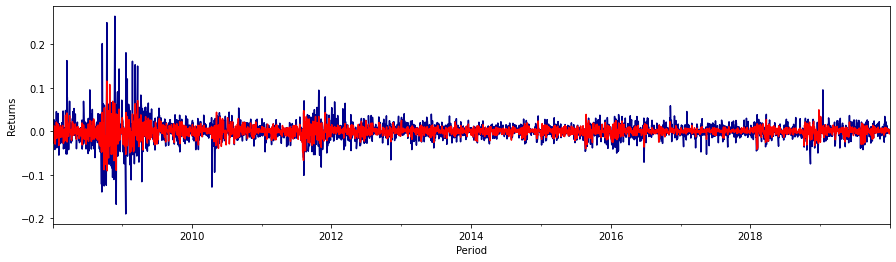

In [16]:
# now we generate the AR(5) models and OLS model using 2008-19 data to understand impact of 2008 recession
GS_08 = web.get_data_yahoo('GS',start='01/01/2008',end='31/12/2019',interval='d')['Adj Close']
SP500_08 = web.get_data_yahoo('^GSPC',start='01/01/2008',end='31/12/2019',interval='d')['Adj Close']
GS_returns_08 = GS_08.pct_change()
SP500_returns_08 = SP500_08.pct_change()
GS_data_08 = GS_returns_08.dropna()
GS_data_08.index = pd.DatetimeIndex(GS_data_08.index).to_period('D')
SP500_data_08 = SP500_returns_08.dropna()
SP500_data_08.index = pd.DatetimeIndex(SP500_data_08.index).to_period('D')
GS_data_08.plot(x='Date',y='Returns',color = 'darkblue',xlabel = 'Period',ylabel = 'Returns',figsize = (15,4))
SP500_data_08.plot(x='Date',y='Returns',color = 'red',xlabel = 'Period',ylabel = 'Returns',figsize = (15,4))

In [17]:
model_GS_08 = AutoReg(GS_data_08,lags = 5,old_names = True).fit()
print(model_GS_08.summary())

                            AutoReg Model Results                             
Dep. Variable:              Adj Close   No. Observations:                 3020
Model:                     AutoReg(5)   Log Likelihood                7030.026
Method:               Conditional MLE   S.D. of innovations              0.024
Date:                Thu, 31 Dec 2020   AIC                             -7.497
Time:                        17:02:39   BIC                             -7.483
Sample:                    01-10-2008   HQIC                            -7.492
                         - 12-31-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0005      0.000      1.060      0.289      -0.000       0.001
Adj Close.L1    -0.0443      0.018     -2.435      0.015      -0.080      -0.009
Adj Close.L2    -0.0305      0.018     -1.67

In [18]:
model_SP500_08 = AutoReg(SP500_data_08,lags = 5,old_names = True).fit()
print(model_SP500_08.summary())

                            AutoReg Model Results                             
Dep. Variable:              Adj Close   No. Observations:                 3020
Model:                     AutoReg(5)   Log Likelihood                8999.120
Method:               Conditional MLE   S.D. of innovations              0.012
Date:                Thu, 31 Dec 2020   AIC                             -8.803
Time:                        17:02:39   BIC                             -8.789
Sample:                    01-10-2008   HQIC                            -8.798
                         - 12-31-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0004      0.000      1.947      0.052   -2.83e-06       0.001
Adj Close.L1    -0.1005      0.018     -5.530      0.000      -0.136      -0.065
Adj Close.L2    -0.0710      0.018     -3.88

In [19]:
X_08 = sm.add_constant(SP500_data_08)
market_model_08 = sm.OLS(GS_data_08,X_08).fit()
print(market_model_08.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     3459.
Date:                Thu, 31 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:02:39   Log-Likelihood:                 8186.1
No. Observations:                3020   AIC:                        -1.637e+04
Df Residuals:                    3018   BIC:                        -1.636e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.395      0.6